In [577]:
### Initial Import Statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.constants as sci
import scipy

In [578]:
### Important Functions
def print_list(lis):
    for line in lis:
        print(line)

In [579]:
### Read Data and print header
file = open('falc.dat.txt', mode='r')
text = file.readlines()
header = text[:14]
print_list(header)

data = np.loadtxt('falc.dat.txt', dtype = float, comments = '#')
data = data.transpose()

#col-1 = height in atmosphere above tau_5000A = 1, h [km]
h = data[0] 
#col-2 = radial optical depth in the continuum at 5000 A, tau_5000 [unitless]
tau = data[1]
#col-3 = mass column density, m [g/cm^2]
m = data[2]
#col-4 = temperature, T [K]
T = data[3]
#col-5 = turbulent velocity, vturb [km/s]
vturb = data[4]
#col-6 = neutral hydrogen density, n_H [#/cm^3]
n_H = data[5]
#col-7 = free proton density, n_p [#/cm^3]
n_p = data[6]
#col-8 = free electron density, n_e [#/cm^3]
n_e = data[7]
#col-9 = total pressure, P_tot [dyn/cm^2]
P_tot = data[8]
#col-10 = beta = P_gas/P_tot
beta = data[9]
#col-11 = mass density, rho [g/cm^3]
rho = data[10]

#col-1 = height in atmosphere above tau_5000A = 1, h [km]

#col-2 = radial optical depth in the continuum at 5000 A, tau_5000 [unitless]

#col-3 = mass column density, m [g/cm^2]

#col-4 = temperature, T [K]

#col-5 = turbulent velocity, vturb [km/s]

#col-6 = neutral hydrogen density, n_H [#/cm^3]

#        NOTE: This is the total hydrogen density, summing neutral atoms and 

#              free protons (and H2 molecules but those are virtually absent).

#col-7 = free proton density, n_p [#/cm^3]

#col-8 = free electron density, n_e [#/cm^3]

#col-9 = total pressure, P_tot [dyn/cm^2]

#col-10 = beta = P_gas/P_tot

#col-11 = mass density, rho [g/cm^3]

#



# Part One

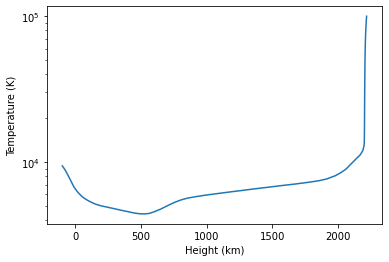

In [580]:
### A
plt.plot(h, T)
plt.ylabel('Temperature (K)')
plt.xlabel('Height (km)')
plt.yscale('log')

plt.savefig('finalprojectImages/finalproject_A.pdf')

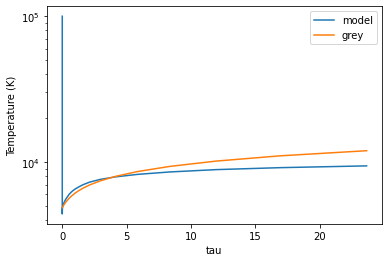

In [581]:
### B
# actual tau vs T with theoretical
plt.plot(tau,T,label='model')
T_eff = 5780
# T(τ ) = Teff(3/4τ + 1/2)^1/4 
Ttau = T_eff * ((3./4.)*tau+1/2.)**(1./4.)
plt.plot(tau, Ttau,label='grey')
plt.xlabel('tau')
plt.ylabel('Temperature (K)')
plt.yscale('log')
plt.legend()

plt.savefig('finalprojectImages/finalproject_B.pdf')

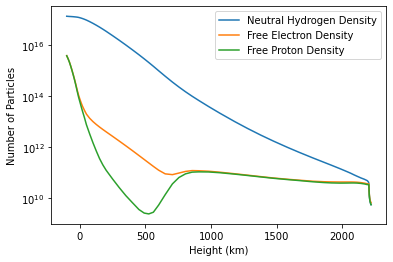

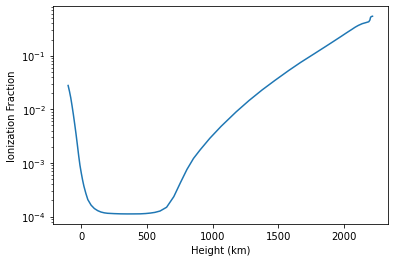

In [582]:
### C
# nh, ne, np vs h, number densities vs height
plt.xlabel('Height (km)')
plt.ylabel('Number of Particles')
plt.plot(h,n_H,label='Neutral Hydrogen Density')
plt.plot(h,n_e, label='Free Electron Density')
plt.plot(h,n_p,label='Free Proton Density')
plt.yscale('log')
plt.legend()
plt.savefig('finalprojectImages/finalproject_C1.pdf')
plt.show()

plt.yscale('log')
plt.ylabel('Ionization Fraction')
plt.xlabel('Height (km)')
y = n_e / (n_H + n_e)
plt.plot(h,y)
plt.savefig('finalprojectImages/finalproject_C2.pdf')
plt.show()


The Solar Atmosphere is 5153.33 density scale heights high.


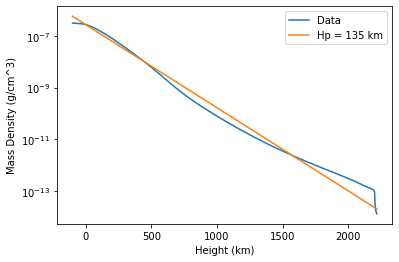

In [583]:
### D

plt.plot(h, rho, label="Data")
plt.yscale('log')
plt.xlabel('Height (km)')
plt.ylabel('Mass Density (g/cm^3)')
#plt.show()

po = 2.771E-07
#Hp = -1*h/np.log(rho/po)
#plt.plot(h, Hp)
# rho = po * exp(-h/Hp)
#log(rho) = log(po) - h/Hp
# h/Hp = log(po) - log(rho)
# Hp = h / (log(po) - log(rho))
#Hp = h / (np.log(po/rho))

rho1 = po * np.exp(-h/140)
#plt.plot(h, rho1, label="Hp = 140 km")
rho2 = po * np.exp(-h/135)
plt.plot(h, rho2, label="Hp = 135 km")
rho3 = po * np.exp(-h/130)
#plt.plot(h, rho3, label="Hp = 130 km")
plt.legend()
#plt.yscale('log')
#plt.xlabel('Height (km)')
#plt.ylabel('Scale Height')

Hp = 135 # km

Rsun = 695700 # km

print("The Solar Atmosphere is", round(Rsun/ Hp, 2), "density scale heights high.")

plt.savefig('finalprojectImages/finalproject_D.pdf')

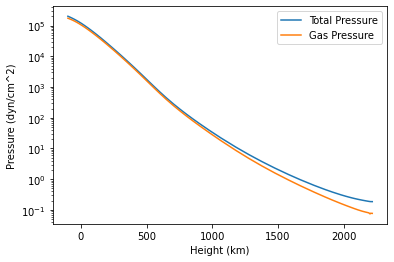

In [584]:
### E

plt.plot(h, P_tot, label="Total Pressure")
plt.xlabel("Height (km)")
plt.ylabel("Pressure (dyn/cm^2)")
plt.yscale('log')

kB = 1.380649*10**(-16)	

P_gas = n_H * kB * T
#beta * P_tot
plt.plot(h, P_gas, label="Gas Pressure")

plt.legend()
#PV = nRT

plt.savefig('finalprojectImages/finalproject_E.pdf')

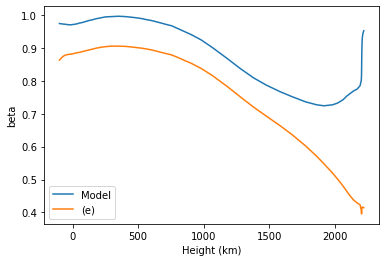

In [585]:
### F

plt.plot(h, beta, label='Model')
plt.xlabel("Height (km)")
plt.ylabel("beta")

ratio = P_gas / P_tot

plt.plot(h, ratio,label='(e)')

plt.legend()

plt.savefig('finalprojectImages/finalproject_F.pdf')

27393.420858533707
surfacegravity = 27397.83 cm/s^2


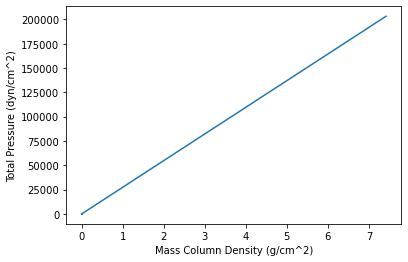

In [586]:
### G

plt.plot(m, P_tot)

#  P_tot [dyn/cm^2]
# 1 g cm/s^2 / cm^2
# m [g/cm^2]

print(P_tot[1]/m[1])

line = linregress(m, P_tot)

print("surfacegravity =", round(line.slope, 2), 'cm/s^2')

plt.xlabel('Mass Column Density (g/cm^2)')
plt.ylabel('Total Pressure (dyn/cm^2)')

plt.savefig('finalprojectImages/finalproject_G.pdf')

0.7138430451854878


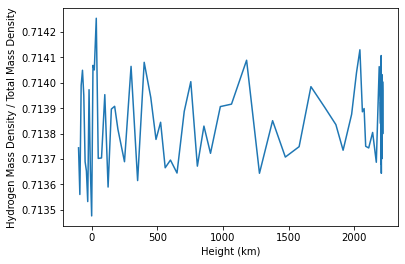

0.9972387341241264


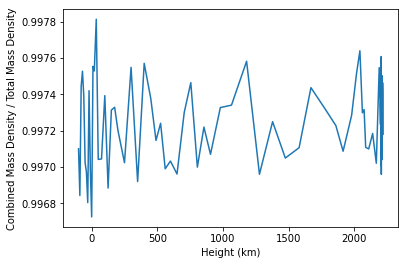

0.002761265875873553
Average Fraction of Metals: 0.002761265875873553


In [587]:
### H

# hydrogen mass density / total mass density
H_mass = n_H * 1.6726219 * 10**(-24) #grams
mass_ratio = H_mass / rho
print(np.mean(mass_ratio))

plt.plot(h, mass_ratio)
plt.xlabel('Height (km)')
plt.ylabel('Hydrogen Mass Density / Total Mass Density')
plt.savefig('finalprojectImages/finalproject_H1.pdf')
plt.show()

n_He = n_H * 0.1
He_mass = n_He * 3.97 * 1.6726219 * 10**(-24)
mass_ratio = (H_mass+He_mass) / rho
print(np.mean(mass_ratio))

plt.plot(h, mass_ratio)
plt.xlabel('Height (km)')
plt.ylabel('Combined Mass Density / Total Mass Density')
plt.savefig('finalprojectImages/finalproject_H2.pdf')
plt.show()

print(1-np.mean(mass_ratio))

print("Average Fraction of Metals:", 1-np.mean(mass_ratio))

### Fraction of metals seems off by an order of magnitude

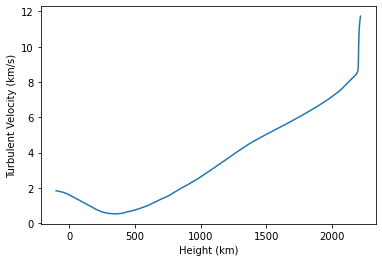

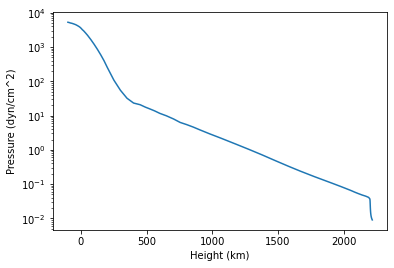

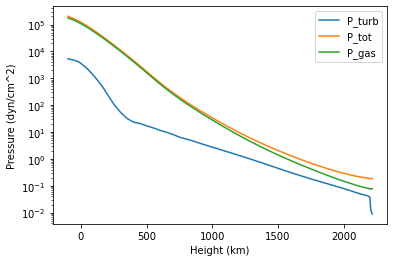

In [588]:
### I

plt.plot(h, vturb)
plt.xlabel("Height (km)")
plt.ylabel("Turbulent Velocity (km/s)")
plt.savefig('finalprojectImages/finalproject_I1.pdf')
plt.show()


P_turb = 0.5 * rho * (vturb*1000*100)**2
plt.plot(h, P_turb)
plt.xlabel("Height (km)")
plt.ylabel("Pressure (dyn/cm^2)")
plt.yscale('log')
plt.savefig('finalprojectImages/finalproject_I2.pdf')
plt.show()

plt.plot(h, P_turb, label='P_turb')
plt.plot(h, P_tot, label = 'P_tot')
plt.plot(h, P_gas, label = 'P_gas')
plt.xlabel("Height (km)")
plt.ylabel("Pressure (dyn/cm^2)")
plt.yscale('log')
plt.legend()
plt.savefig('finalprojectImages/finalproject_I3.pdf')
plt.show()


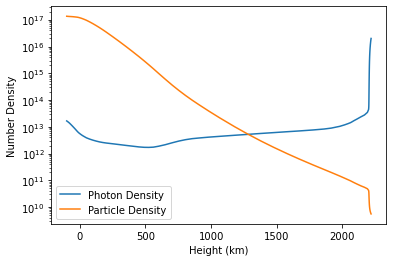

In [589]:
### J

n_phot = 20 * T**3
plt.plot(h, n_phot, label='Photon Density')
plt.plot(h, n_H, label='Particle Density')
plt.yscale('log')
plt.xlabel('Height (km)')
plt.ylabel('Number Density')
plt.legend()
plt.savefig('finalprojectImages/finalproject_J.pdf')
plt.show()


# Part Two

In [590]:
spfile = open('solspect.dat.txt', mode='r')
sptext = spfile.readlines()
spheader = sptext[:14]
#print_list(spheader)

spec = np.loadtxt('solspect.dat.txt', dtype = float, comments = '#')
spec = spec.transpose()

lamb = spec[0]
piFlux = spec[1]
contFlux = spec[2]
piInt = spec[3]
contInt = spec[4]

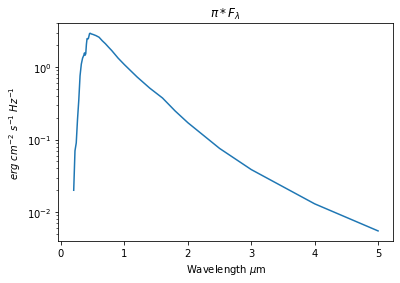

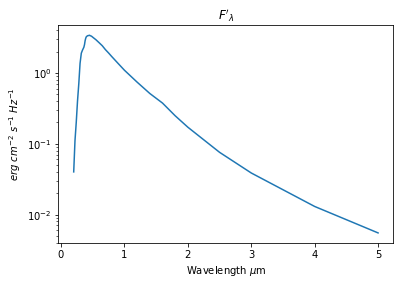

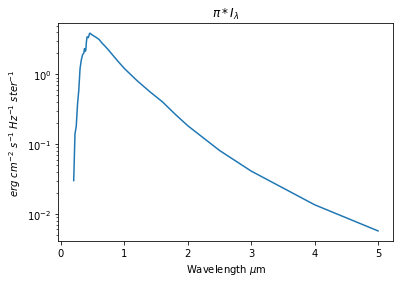

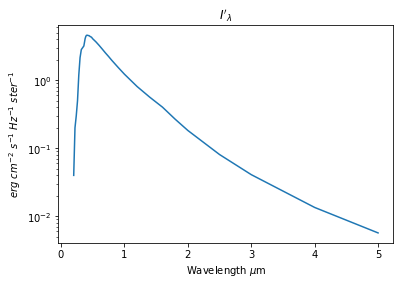

0.41


In [709]:
### K
plt.xlabel("Wavelength $\mu$m")
plt.plot(lamb, piFlux)
plt.yscale('log')
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$')
#plt.legend()
plt.title("$\pi * F_\lambda$")
plt.savefig('projectimages/finalproject_K1.pdf')
plt.show()

plt.xlabel("Wavelength $\mu$m")
plt.plot(lamb, contFlux)
plt.yscale('log')
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$')
#plt.legend()
plt.title("$F'_\lambda$")
plt.savefig('projectimages/finalproject_K2.pdf')

plt.show()


plt.xlabel("Wavelength $\mu$m")
plt.plot(lamb, piInt)
plt.yscale('log')
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$ $ster^{-1}$')
#plt.legend()
plt.title("$\pi * I_\lambda$")
plt.savefig('projectimages/finalproject_K3.pdf')

plt.show()

plt.xlabel("Wavelength $\mu$m")
plt.plot(lamb, contInt)
plt.yscale('log')
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$ $ster^{-1}$')
#plt.legend()
plt.title("$I'_\lambda$")
plt.savefig('projectimages/finalproject_K4.pdf')

plt.show()

i = np.argmax(contInt)
print(lamb[i])

In [710]:
### L
# analytically solved

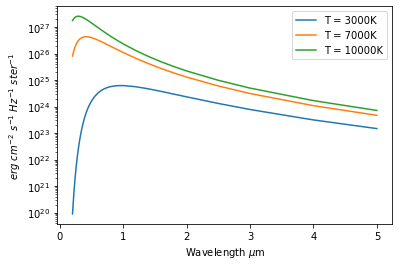

In [711]:
### M
def planck_law(lamby, T):
    kB = 8.617333262145*10**(-5)
    h = 4.135667696 * 10**(-15)
    c = 299792458 * 100
    lamby = lamby * 10**-4
    top = 2*h*c**2 / lamby**5
    bottom = np.exp(h * c / (lamby * kB * T)) - 1
    return top/bottom

test1 = planck_law(lamb, 3000) #* np.exp(-14)
test2 = planck_law(lamb, 7000) #* np.exp(-14)
test3 = planck_law(lamb, 10000) #* np.exp(-14)
plt.plot(lamb, test1, label='T = 3000K')
plt.plot(lamb, test2, label='T = 7000K')
plt.plot(lamb, test3, label='T = 10000K')
plt.legend()
plt.yscale('log')
plt.xlabel("Wavelength $\mu$m")
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$ $ster^{-1}$')

plt.savefig('projectimages/finalproject_M.pdf')


0.41


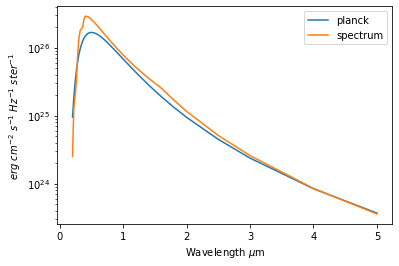

In [594]:
### N
#test = planck_law(lamb, 7000)*10**(-13)
T_Sun = 5800
plt.plot(lamb, planck_law(lamb, T_Sun),label='planck')
#plt.plot(lamb, planck_law(lamb, 6000)*10**(-13),label='planck')
plt.plot(lamb, contInt*10**(25.8), label='spectrum')
#plt.plot(lamb, contFlux, label='spectrum')

plt.yscale('log')
plt.legend()

i = np.argmax(test)
plt.xlabel("Wavelength $\mu$m")
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$ $ster^{-1}$')


plt.savefig('projectimages/finalproject_N.pdf')

print(lamb[i])

In [612]:
### O
# cgs
def saha(gi, gplus, X, T):
    kB = 8.617333262145*10**(-5)
    me = 9.10938356 * 10**(-31) * 1000
    h = 4.135667696 * 10**(-15)
    ne = 9.083*10**(10)
    Pe = ne * kB * T
    nplusni = (2/ne) * (gplus/gi) * ((2*sci.pi*me*kB*T)/h**2.)**(3./2.) * np.exp(-X/(kB*T))
    return nplusni

def boltz(gl, gu, El, Eu, T):
    kB = 8.617333262145*10**(-5)
    njni = (gu / gl) * np.exp(-(Eu - El) / (kB * T))
    return njni

In [841]:
### P
# cgs
def alpha_NaD(lambo, nlnE, nH, flu, T):
    kB = 1.380649*10**(-16)
    me = 9.10938356 * 10**(-31) * 1000 # 
    h = 6.626196 * 10**(-27) 
    c = 3*10**10
    e = 4.803204*10**-10
    A_Na = 1.8 * 10**(-6)
    alpha1 = np.sqrt(sci.pi) * e**(2) / (me * c)
    alpha2 = (lambo**2 / c) * nlnE * nH * A_Na * flu
    alpha3 = 1 - np.exp(-h*c / (lambo * kB * T))
    alpha = alpha1 * alpha2 * alpha3
    return alpha

'''
temp = 5800
nH = 1.002*10**13 # #/cm^3
sahaeq = saha(1, 6, X, temp)
boltzeq = boltz(2, 4, 2.1044, 0.0, temp)
nlnE = 1 / (1 + boltzeq + sahaeq)
alpha = alpha_NaD(5889.95* 10**(-8), nlnE, nH, 0.641, temp)
print('alpha:', alpha)
'''

"\ntemp = 5800\nnH = 1.002*10**13 # #/cm^3\nsahaeq = saha(1, 6, X, temp)\nboltzeq = boltz(2, 4, 2.1044, 0.0, temp)\nnlnE = 1 / (1 + boltzeq + sahaeq)\nalpha = alpha_NaD(5889.95* 10**(-8), nlnE, nH, 0.641, temp)\nprint('alpha:', alpha)\n"

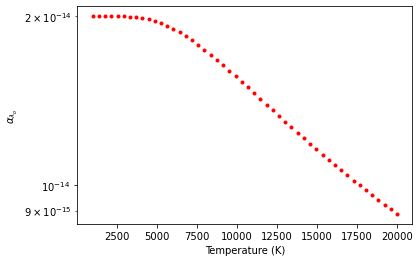

In [773]:
### Q

X = 51391 # eV
nH = 1.002*10**13 # #/cm^3
ne = 9.083*10**(10) # #/cm^3
kB = 8.617333262145*10**(-5) # ev K-1
temp = 6230 # K
lambda_1 = 5889.95 * 10**(-8) # cm
lambda_2 = 5895.92 * 10**(-8) # cm

temperatures = np.linspace(1000, 20000, num=50)
#temperatures = [5800, 4200]

for temp in temperatures:
    sahaeq = saha(1, 6, X, temp)
    #boltz(gl, gu, El, Eu, T) # u = j, l = i
    boltzeq1 = boltz(2, 4, 0.0, 2.1044, temp)
    boltzeq2 = boltz(2, 2, 0.0,  2.1022, temp)

    nlnE_1 = 1 / (1 + boltzeq1 + sahaeq)
    nlnE_2 = 1 / (1 + boltzeq2 + sahaeq)

    alpha_1 = alpha_NaD(lambda_1, nlnE_1, nH, 0.641, temp)
    alpha_2 = alpha_NaD(lambda_2, nlnE_2, nH, 0.320, temp)
    
    plt.plot(temp, alpha_1, 'r.')
    #plt.plot(temp, alpha_2, 'b.')
    
    #print(alpha_1, alpha_2)
    
    #tu = optical_depth(alpha_1, 500)

plt.xlabel(r'Temperature (K)')
#plt.ylabel('$\alpha$')
plt.ylabel(r'$\alpha_{\lambda_o}$')
plt.savefig('projectimages/finalproject_Q.pdf')
plt.yscale('log')
#plt.xlabel('log')

plt.show()
#print(alpha_1, alpha_2)

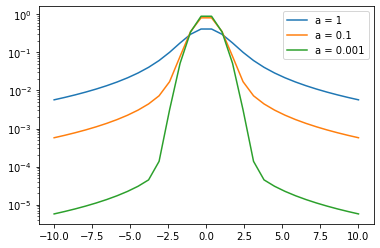

In [774]:
### R

def Voigt(a, u):
    I = scipy.integrate.quad(lambda y: np.exp(-y**2)/(a**2 + (u-y)**2), -np.inf, np.inf)[0]
    return (a/np.pi)*I

def part_r(a):
    #a = 0.1
    label = "a = " + str(a)
    u_range = np.linspace(-10, 10, 30)
    plt.plot(u_range, [Voigt(a,u) for u in u_range], label = label)
    return [Voigt(a,u) for u in u_range]

part_r(1)
part_r(0.1)
part_r(0.001)
plt.yscale('log')
plt.legend()
plt.savefig('projectimages/finalproject_R.pdf')



In [842]:
### S

#Emergent Intensity

def emergent_intensity(lamb, Tl, Tu, tau_la):
    I = planck_(lamb, Tl)*np.exp(-tau_la) + planck_(lamb, Tu)*(1-np.exp(-tau_la))
    return I

### ???????

def broadening(lamb, lam, T, vturb):
    m = 3.8175*10**(-23) # mass of sodium atom in grams
    c = 3*10**10
    del_lam = (lam / c) * np.sqrt(2*kB*T/m+vturb**2)
    u = (lamb - lam)/del_lam
    return (np.sqrt(sci.pi * del_lam))**-1., u

def Voigt_alt(nlnE, nH, temp):
    I = scipy.integrate.quad(lambda y: alpha_NaD(5889.95* 10**(-8), nlnE, nH, 0.641, temp), -np.inf, np.inf)[0]
    return (a/np.pi)*I

6.309542113267997e-10
40228888490414.64


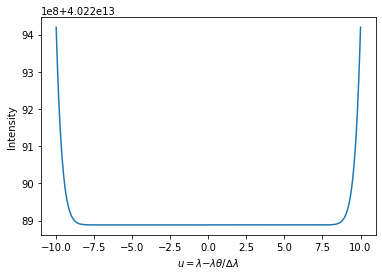

In [852]:
### T
kB = 1.380649*10**(-16)

#emergent_intensity(lamb, Tl, Tu, tau_l)

def emergent_intensity(lamb, Tl, Tu, tau_l):
    I = planck_(lamb, Tl)*np.exp(-tau_l) + planck_(lamb, Tu)*(1-np.exp(-tau_l))
    return I

def planck_(lamby, T):
    kB = 1.380649*10**(-16)	#8.617333262145*10**(-5) # eV K-1
    h = 6.626196 * 10 **(-27)#4.135667696 * 10**(-15) # eV / s
    c = 3*10**10#299792458 * 100 # cm/s
    top = 2*h*c**2 / lamby**5
    bottom = np.exp(h * c / (lamby * kB * T)) - 1
    return top/bottom

u_range = np.linspace(-10, 10, 500)

Tl = 5700
Tu = 4200

lam = 5000 * 10**(-8)

lamo = 5889.95 * 10**(-8)
c = 3*10**10
mNe = 3.8175*10**(-23)
vT = 2.7 * 1000 * 100 #cm/s
del_lam = (lamo/c)*np.sqrt(2*kB*Tu/mNe + vT**2)
print(del_lam)
a = 0.1

temp = 5800
nH = 1.002*10**13 # #/cm^3
X = 51391
sahaeq = saha(1, 6, X, Tu)
boltzeq = boltz(2, 4, 0.0, 2.1044, Tu)
nlnE = 1 / (1 + boltzeq + sahaeq)
alpha = alpha_NaD(5889.95* 10**(-8), nlnE, nH, 0.641, Tu)

intensities = []

for u in range(len(u_range)):
    ta = (Voigt(a,u_range[u])*np.sqrt(sci.pi * del_lam)**-1)#*alpha*300*1000*100
    tem = emergent_intensity(lam, Tl, Tu, ta)
    intensities.append(tem)
    
print(min(intensities))

plt.plot(u_range, intensities)
plt.xlabel(r'$u = λ − λ\theta/∆λ$')
plt.ylabel('Intensity')
#plt.yscale('log')
plt.savefig('projectimages/finalproject_T.pdf')


In [844]:
alpha

1.9826780770314538e-14

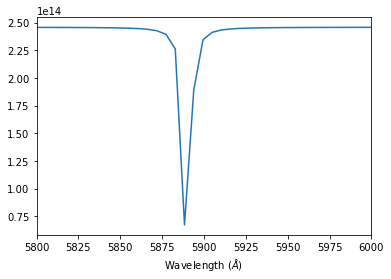

67221645197987.93


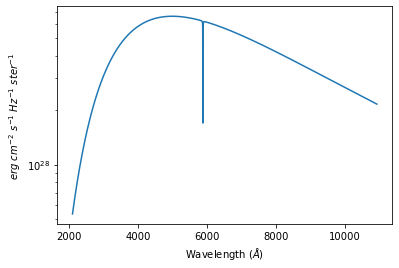

In [860]:
### U
lamo = 5889.95 * 10**(-8) # cm

de_lam = (lamo/(3*10**10)) * np.sqrt(2*kB*Tu/mNe + vT**2)

u_range = np.linspace(-60000, 80000, 1600)
u_w = u_range*de_lam + lamo # units: 
#print(de_lam)

intensitie = []

for u in range(len(u_range)):
    ta = (Voigt(a,u_range[u])*np.sqrt(sci.pi * del_lam)**-1)#*alpha*300*1000*100
    tem = emergent_intensity(lam, Tl, Tu, ta)
    intensitie.append(tem)

intensitie = np.array(intensitie)#/np.median(intensitie)
plt.plot(u_w*10**8, intensitie)
plt.yscale('linear')
plt.xlabel('Wavelength (${\AA}$)')
plt.xlim(5800,6000)
#plt.savefig('projectimages/finalproject_U1.pdf')
plt.show()

planck_sun = planck_(u_w, 5800)

#plt.plot(u_w, planck_sun)

plt.plot(u_w*10**8, planck_sun*intensitie)
#plt.plot(lamb*10**4, piInt*10**14)

plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$ $ster^{-1}$')
plt.xlabel('Wavelength (${\AA}$)')
#plt.xlabel(r'$u = λ − λ\theta/∆λ$')
#plt.xlim(0.00005, 0.00007)
#plt.ylim(248244451328274.53,268244451328274.53)
plt.yscale('log')
#plt.xlim(5800,6000)
plt.savefig('projectimages/finalproject_U2.pdf')
print(min(intensitie))

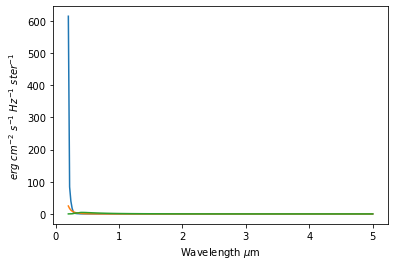

In [846]:
### V

intensity_ratio = I / contInt

plt.plot(lamb, intensity_ratio, label='Intensity Ratio')
plt.plot(lamb, I, label='Emergent')
plt.plot(lamb, contInt, label='Continuum')
plt.xlabel("Wavelength $\mu$m")
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$ $ster^{-1}$')


plt.savefig('projectimages/finalproject_V.pdf')


In [ ]:
Tl = 5700
Tu = 4200
lam = 5000 * 10**(-8) # cm
a = 0.1
heig = 300 * 1000* 100 # height of the slab cm
vT = 5 * 1000 * 100 # cm/s
broad, uran = broadening(lamb, lam, Tu, vT)
phi =  broad * np.array([Voigt(a,u) for u in uran])
tau_0 = alpha * heig
lau_l = tau_0 * phi

I = emergent_intensity(lamb, Tl, Tu, tau_l)

plt.plot(lamb, I)


'''
#T=5700 a1 = 4330.833674958101 a2 = 4322.184886122645
#T=4200 a1 = 953.0437094840529 a2 = 957.838927992108

a_4200 = (953.0437094840529 + 957.838927992108) / 2.
a_5700 = (4330.833674958101 + 4322.184886122645) / 2.
tau_4200 = (-a_4200 + a_5700) * 300*1000*100
u_range = np.linspace(-5, 5, 30)
plt.plot(u_range, emergent_intensity(u_range, Tl, Tu, tau_4200, 0.1))
print(max(emergent_intensity(u_range, Tl, Tu, a_4200, 0.1)))
'''

In [ ]:


Tl = 5700
Tu = 4200
lam = 5000 * 10**(-8) # cm
a = 0.1
he = 300*1000*100 # cm #2318.2 * 1000 * 100 # 
dellam = 0.02


tau = np.inf
I = emergent_(lamb, Tl, Tu, tau, 0.1)
plt.plot(lamb, I, label='$\tau$ = $\inf$')

tau = 0
I = emergent_(lamb, Tl, Tu, tau, 0.1)
plt.plot(lamb, I, label='$\tau$ = 0')

tau = 1
I = emergent_(lamb, Tl, Tu, tau, 0.1)
plt.plot(lamb, I, label='$\tau$ = 1')

In [ ]:
Tl = 5700
Tu = 4200
tau = 1


def emergent_(lamb, Tl, Tu, tau_la, a):
    I = planck_law(lamb, Tl)*np.exp(-tau_la) + planck_law(lamb, Tu)*(1-np.exp(-tau_la))
    
    return I #- v

u_range = np.linspace(-5, 5, 100)
plt.plot(u_range, emergent_(u_range, Tl, Tu, 1, 0.1))
plt.ylabel('$erg$ $cm^{-2}$ $s^{-1}$ $Hz^{-1}$ $ster^{-1}$')
plt.xlabel(r'$u = λ − λ\theta/∆λ$')
plt.yscale('log')

#


print(max(emergent_(u_range, Tl, Tu, 1, 0.1)))

In [ ]:
Tl = 5700
Tu = 4200
lam = 5000 * 10**(-8) # cm
a = 0.1
tau_l = 1

#I = emergent_intensity(lamb, Tl, Tu, tau_l)

#plt.plot(lamb, I)


#print(broad, u)

#plt.legend()



#plt.show()

print()